In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Displaying data

In [21]:
df = pd.read_csv('sleep_health_data.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Exploration and Cleaning

In [22]:
df = df.drop(['Person ID'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [5]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


In [24]:
df['Occupation'] = df['Occupation'].replace({'Sales Representative': 'Salesperson'})

In [25]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,34
Software Engineer,4
Scientist,4


In [26]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [27]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

In [28]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,148
Obese,10


### Statistical Summary

In [29]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [30]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df.groupby('Occupation')[numerical_cols].mean().sort_values(by='Quality of Sleep')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Occupation,,,,,,,
Scientist,33.500000,6.000000,5.000000,41.000000,7.000000,78.500000,5350.000000
Salesperson,42.617647,6.373529,5.882353,44.117647,7.058824,72.764706,5823.529412
Software Engineer,31.250000,6.750000,6.500000,48.000000,6.000000,75.500000,5800.000000
Doctor,32.676056,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704
Teacher,41.725000,6.690000,6.975000,45.625000,4.525000,67.225000,5957.500000
Manager,45.000000,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000
Nurse,51.794521,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247
Accountant,39.621622,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081
Lawyer,39.425532,7.410638,7.893617,70.425532,5.063830,69.638298,7661.702128


It is observed from the above output that, Scientist has the lowest mean quality  of sleep and near to high stress level. Also, their physical activity level is also the lowest as well as their daily steps.

In [31]:
df.groupby('BMI Category')[numerical_cols].mean().sort_values(by='Quality of Sleep')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
BMI Category,,,,,,,
Obese,38.000000,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000
Overweight,47.885135,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541
Normal,38.472222,7.387963,7.638889,57.949074,5.134259,68.976852,6875.462963


People having obesity tends to have very low mean daily steps aslo very low mean physical activity level than the other two BMI categories.

In [32]:
df.groupby('Gender')[numerical_cols].mean().sort_values(by='Quality of Sleep')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Gender,,,,,,,
Male,37.074074,7.036508,6.968254,59.201058,6.079365,71.052910,6793.650794
Female,47.405405,7.229730,7.664865,59.140541,4.675676,69.259459,6840.540541


Male have higher mean stress level than women

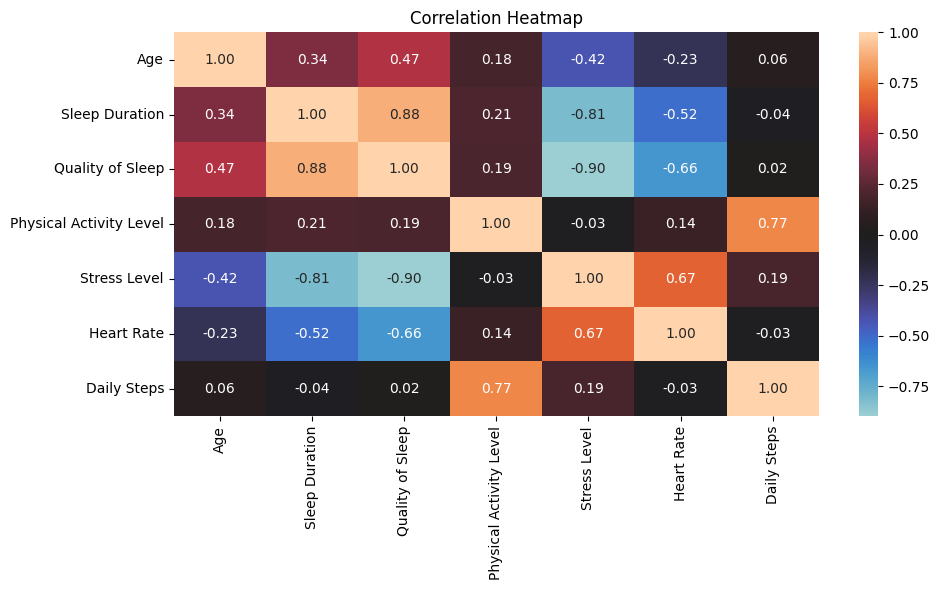

In [35]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            center=0,
            fmt='.2f')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

From the correlation heatmap, sleep duration is highly associated with quality of sleep. Quality of sleep also have high and moderate correlation with stress level and heart rate respectively. Heart rate on the other hand has moderate correlation with stress level. Sleep duration and stress level have highly negative correlation.

### Visualization

Occupation vs mean of high and moderate correlated features

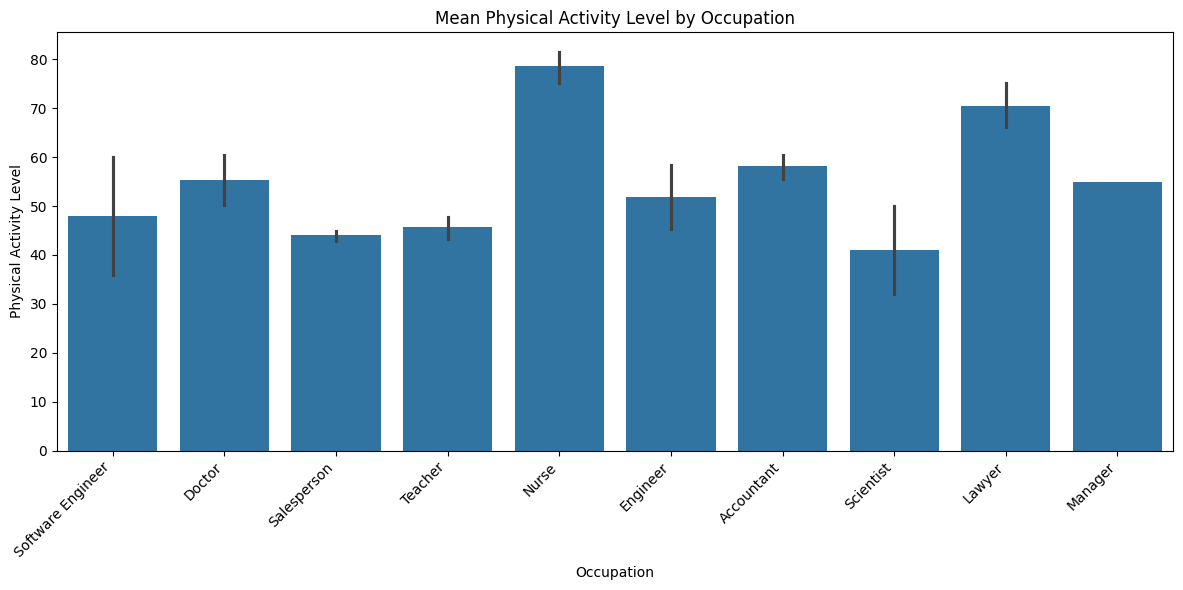

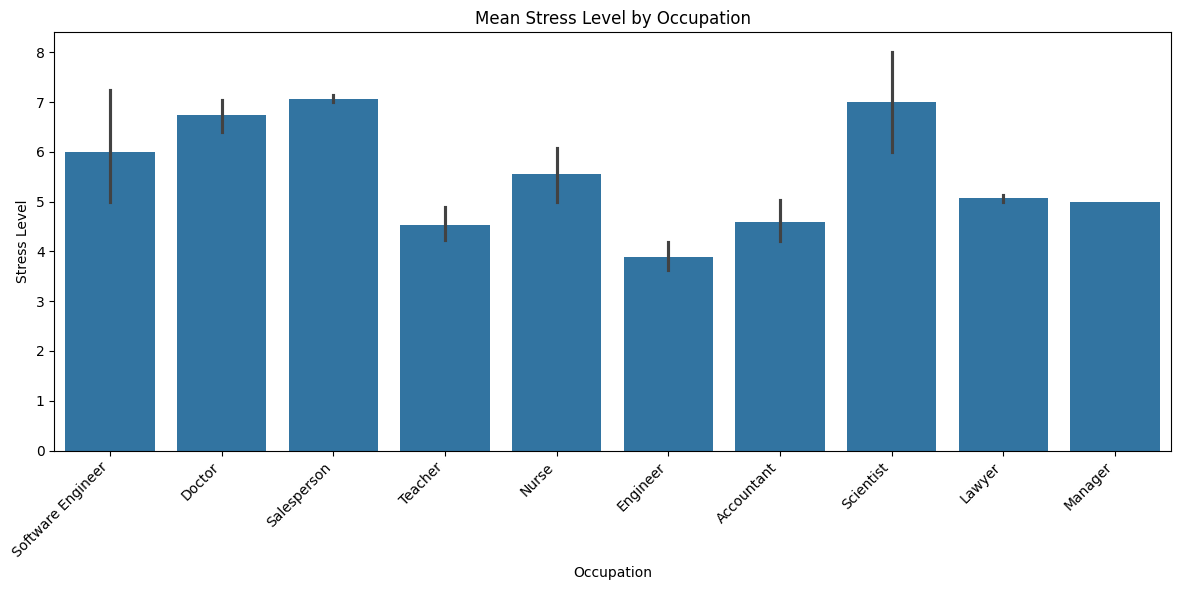

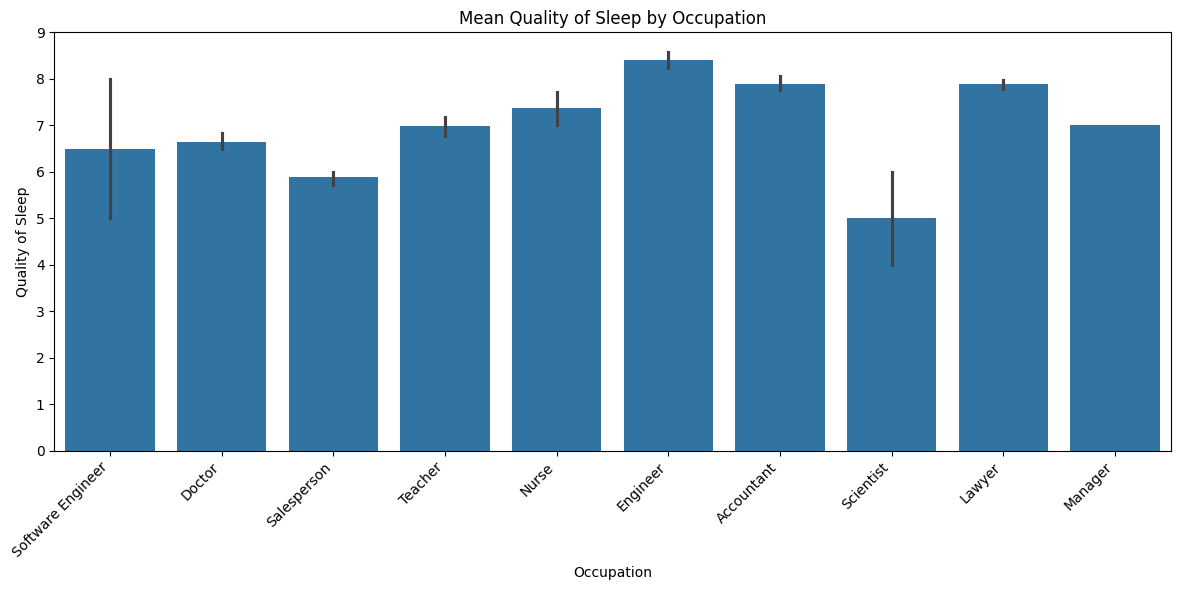

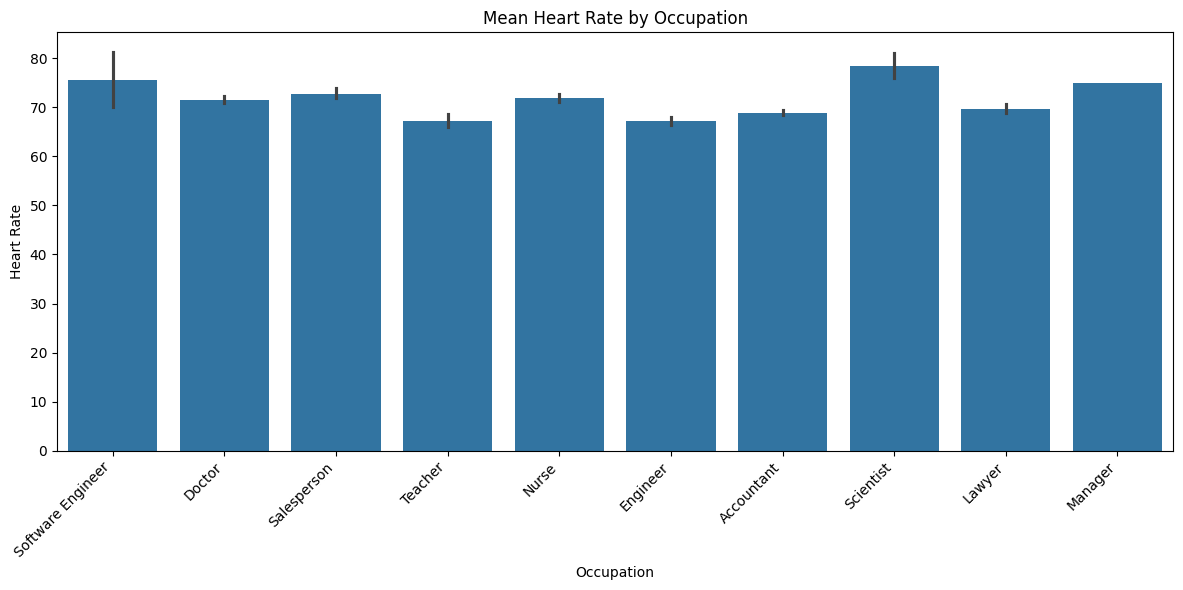

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Physical Activity Level', data=df)
plt.title('Mean Physical Activity Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Physical Activity Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Stress Level', data=df)
plt.title('Mean Stress Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Quality of Sleep', data=df)
plt.title('Mean Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Heart Rate', data=df)
plt.title('Mean Heart Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

BMI Category vs mean of high and moderate correlated features

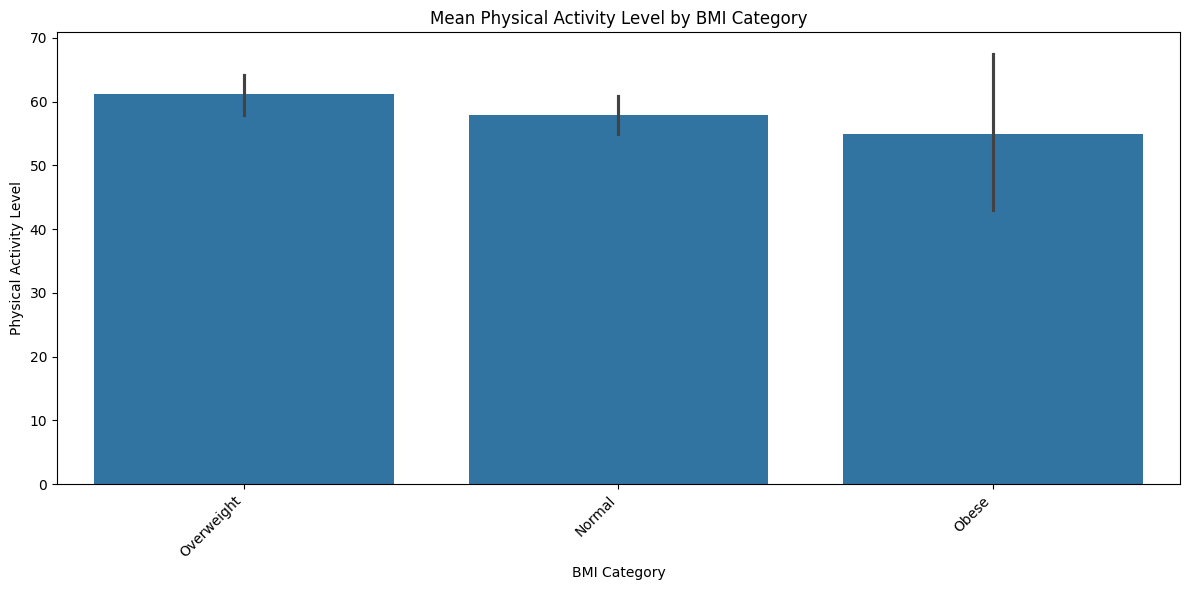

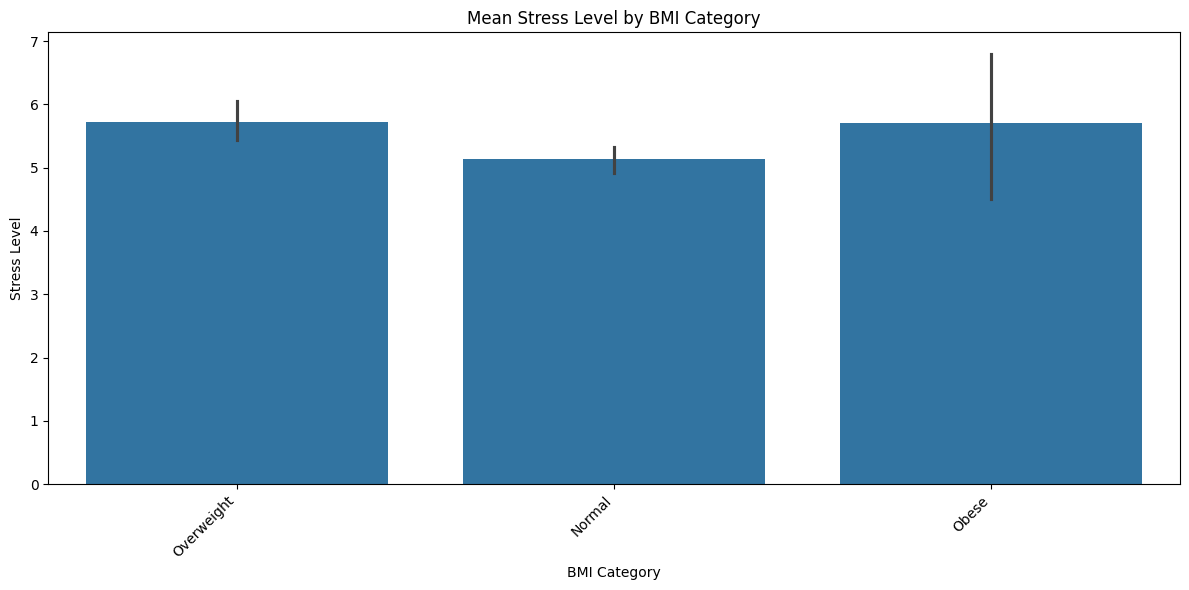

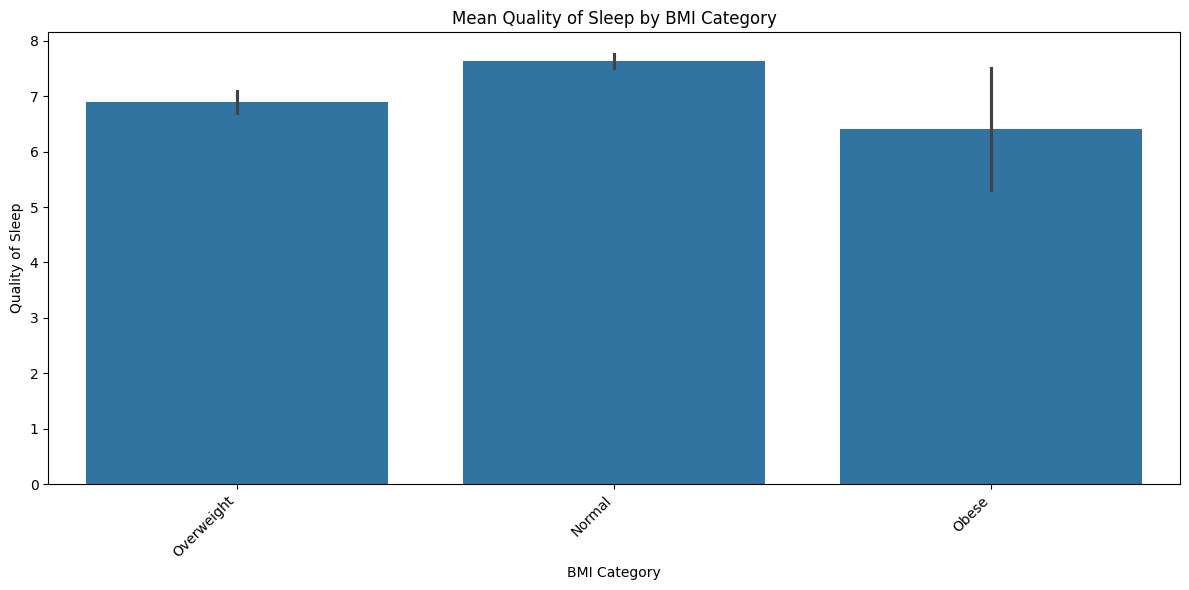

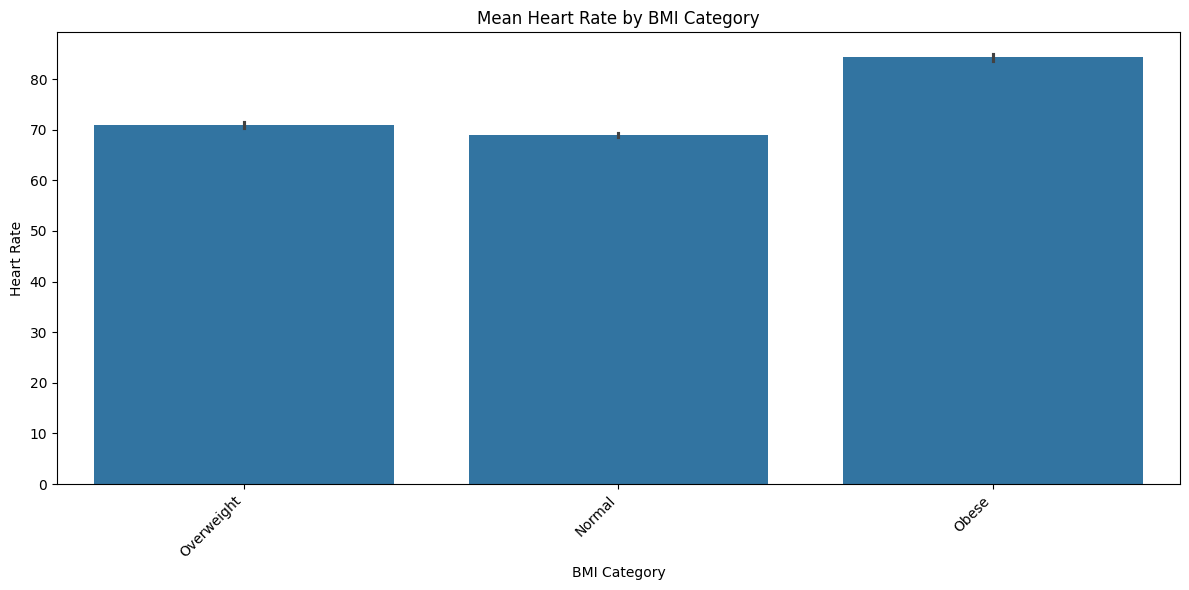

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='BMI Category', y='Physical Activity Level', data=df)
plt.title('Mean Physical Activity Level by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='BMI Category', y='Stress Level', data=df)
plt.title('Mean Stress Level by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Stress Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='BMI Category', y='Quality of Sleep', data=df)
plt.title('Mean Quality of Sleep by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='BMI Category', y='Heart Rate', data=df)
plt.title('Mean Heart Rate by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Gender vs mean high and moderate correlated features

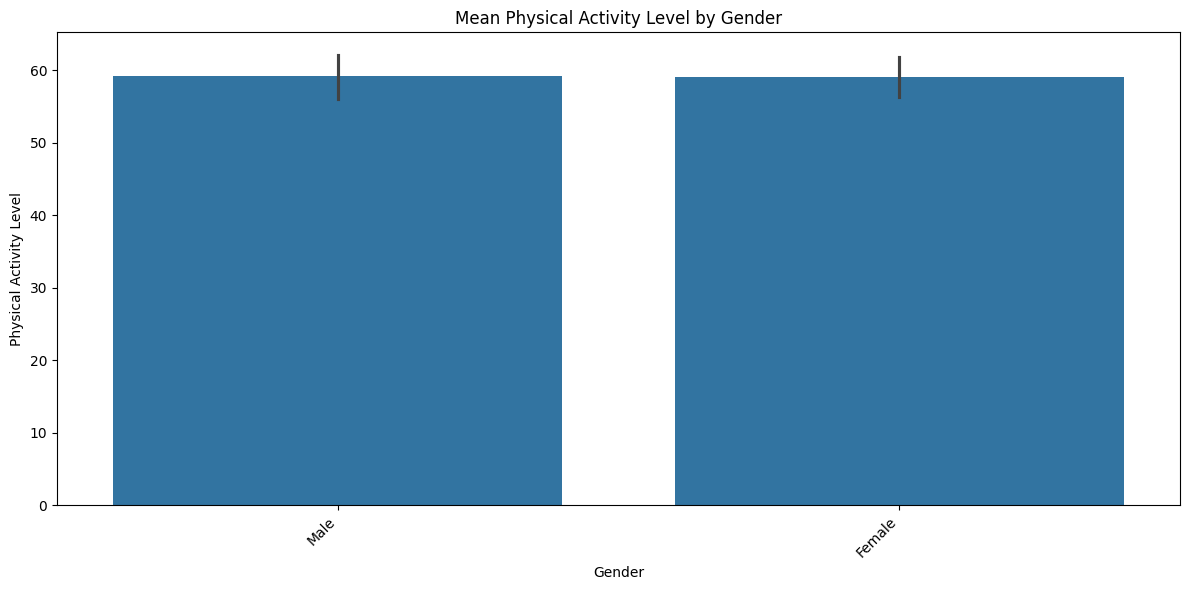

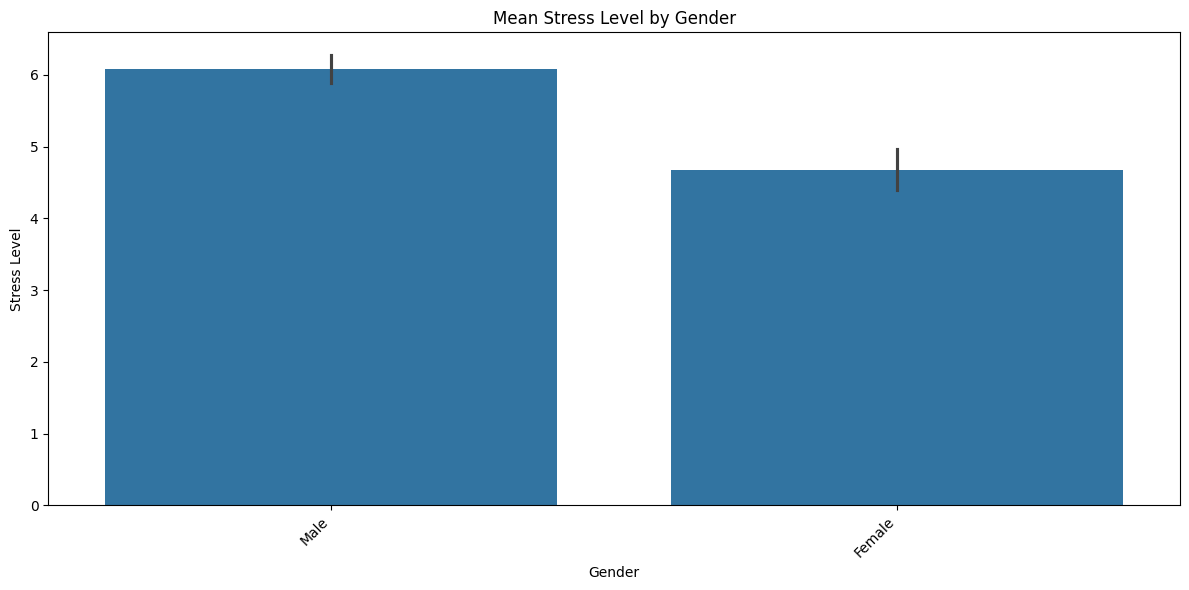

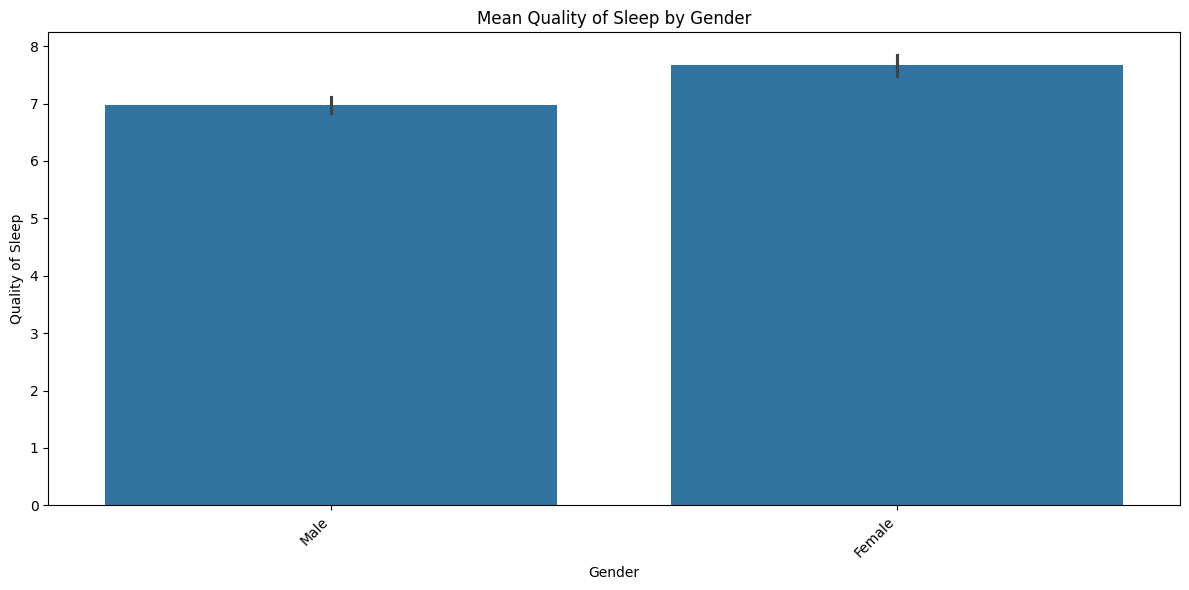

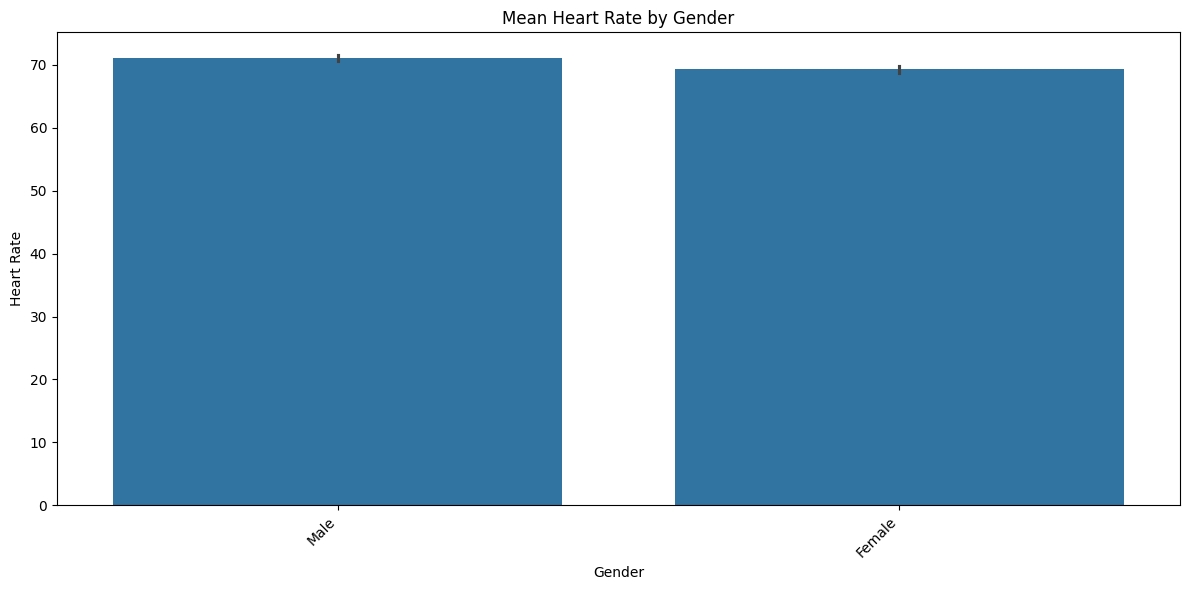

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Physical Activity Level', data=df)
plt.title('Mean Physical Activity Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical Activity Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Stress Level', data=df)
plt.title('Mean Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Quality of Sleep', data=df)
plt.title('Mean Quality of Sleep by Gender')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Heart Rate', data=df)
plt.title('Mean Heart Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Pairplot to better visualize the relationships between numerical features

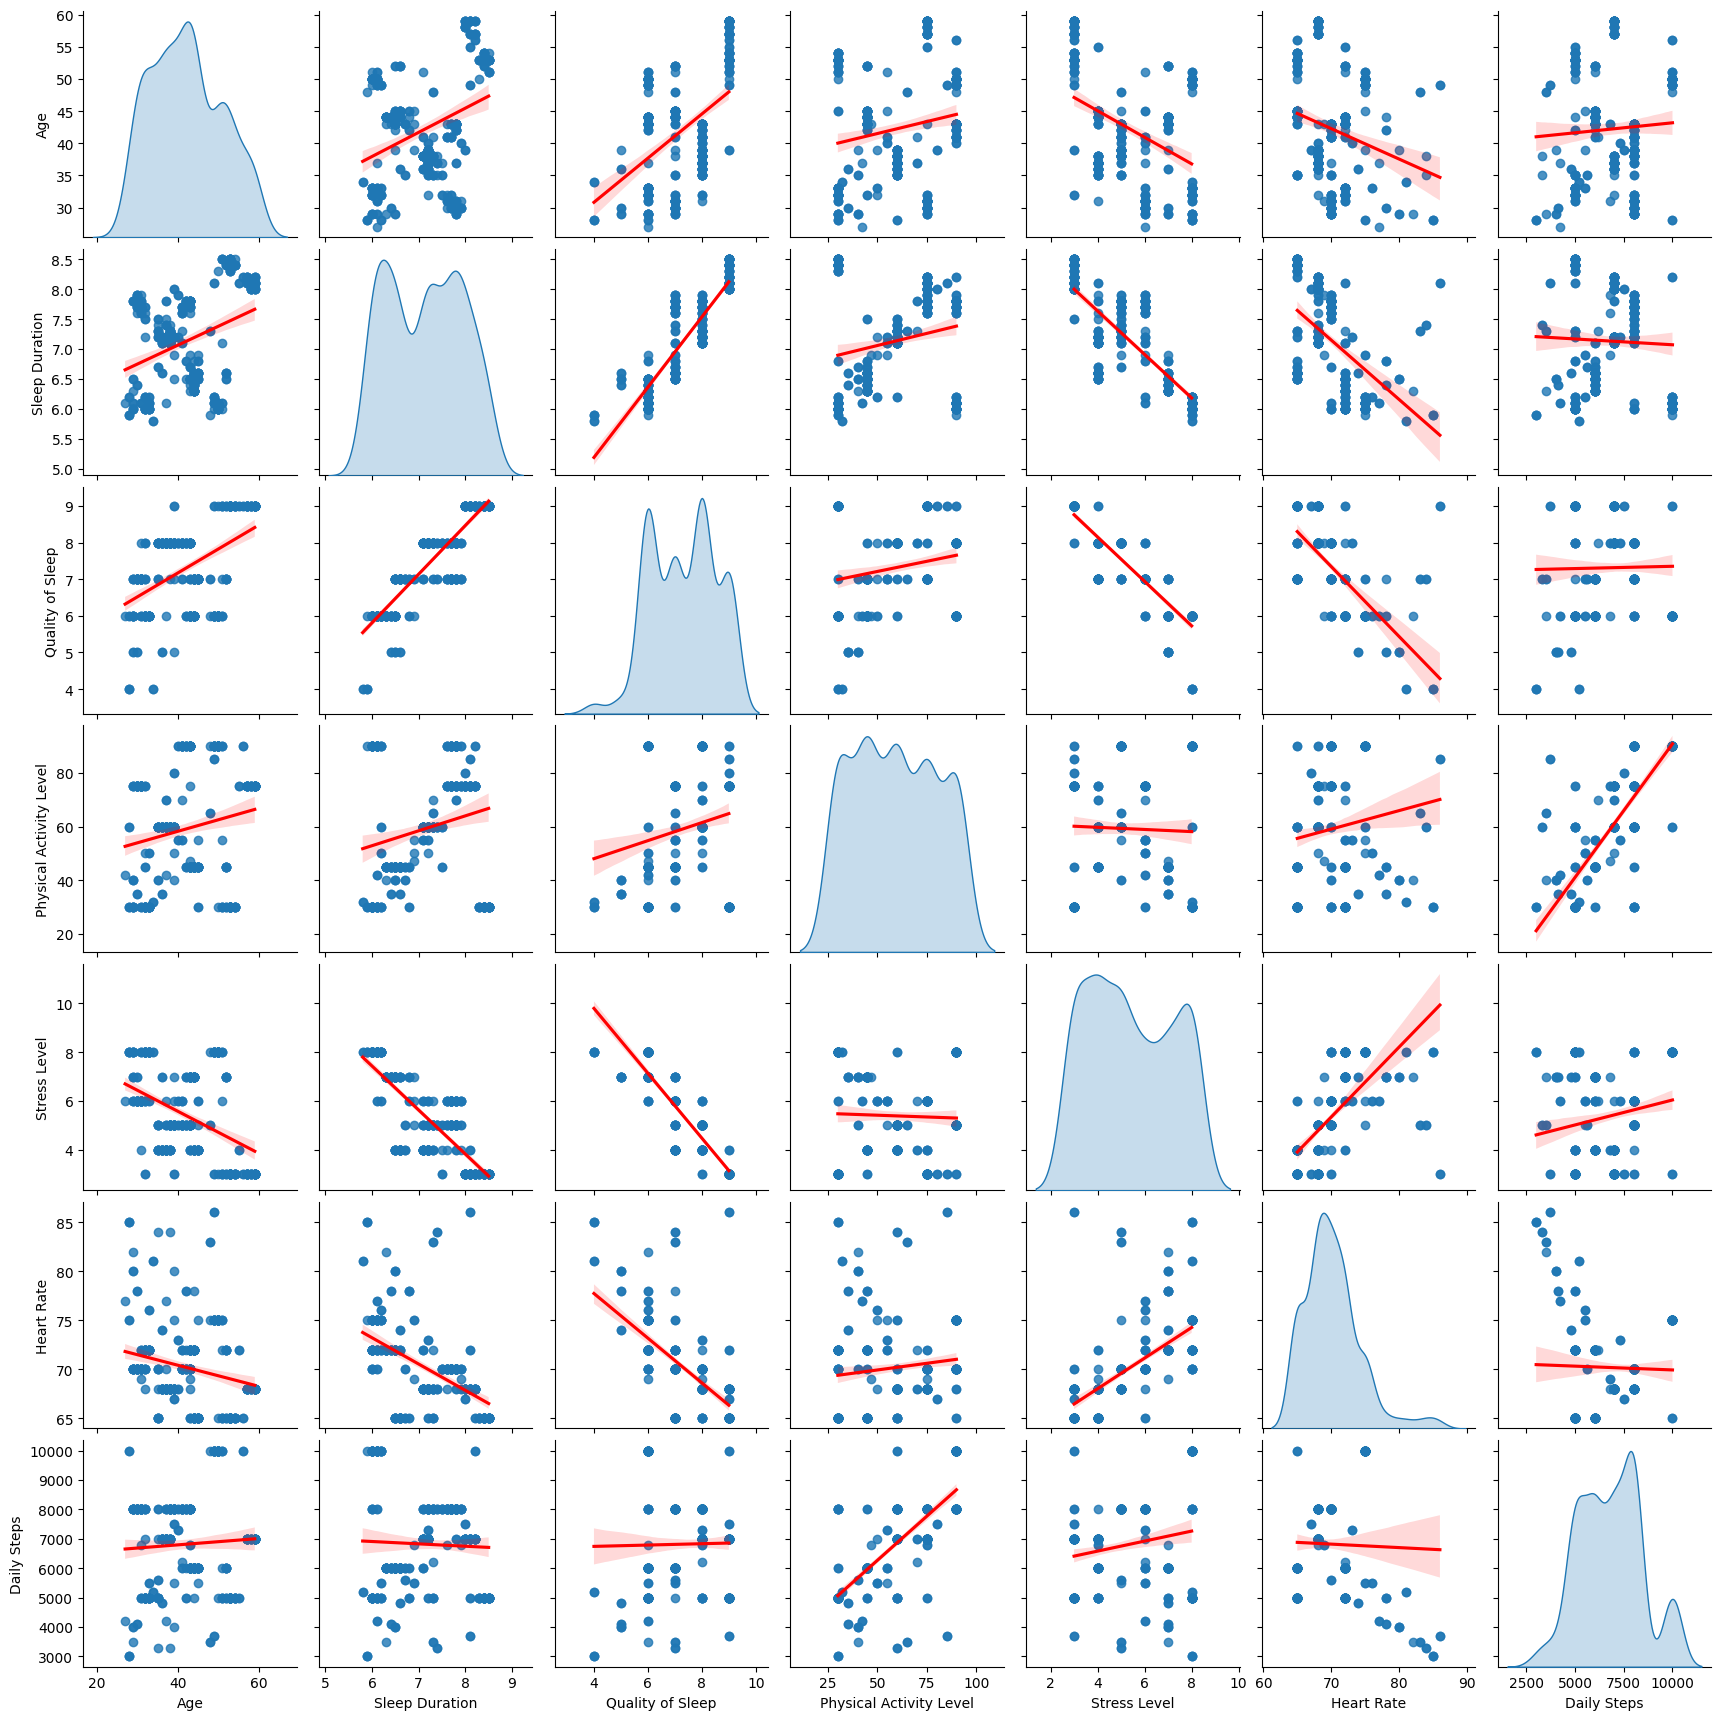

In [51]:
from scipy.stats import linregress

def fitted_line_plot(x, y, **kwargs):
    ax = plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    ax.plot(x, intercept + slope * x, color='red')

sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}}, diag_kind='kde')
plt.show()

### Machine Learning Model Creation

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x=df[['Stress Level','Heart Rate','Sleep Duration','Physical Activity Level']]
y=df['Quality of Sleep']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

model=LinearRegression()
model.fit(train_x,train_y)

y_pred=model.predict(test_x)

mse=mean_squared_error(test_y,y_pred)
r2=r2_score(test_y,y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1474776370124222
R-squared: 0.9022434942028194


In [ ]:
from google.colab import drive
drive.mount('/content/drive')